<a href="https://colab.research.google.com/github/alefonsecabb/Movies-ratings-with-pandas/blob/main/Movies_Ratings_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import panda library, read and show first 5 lines

In [1]:
import pandas as pd
notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#Show de shape of the sheet, number of lines and columns

In [2]:
notas.shape

(100836, 4)

#Rename columns

In [3]:
notas.columns = ["IdUsuário", "IdFilme", "Nota", "momento"]
notas.head()

,IdUsuário,IdFilme,Nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#Counts the amount of each note

In [4]:
notas['Nota'].value_counts()

,count
Nota,
4.0,26818
3.0,20047
5.0,13211
3.5,13136
4.5,8551
2.0,7551
2.5,5550
1.0,2811
1.5,1791


#shows the average and median of notes

In [5]:
print ("Média",notas['Nota'].mean())
print ("Mediana",notas['Nota'].median())

Média 3.501556983616962
Mediana 3.5


#shows the history of notes

<Axes: ylabel='Frequency'>

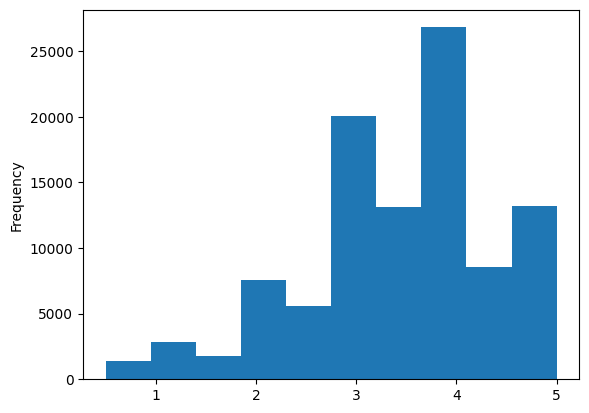

In [6]:
notas.Nota.plot(kind = 'hist')

#describes the whole sheet

In [7]:
notas.Nota.describe()

,Nota
count,100836.000000
mean,3.501557
std,1.042529
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


#uses seaborn to plot

<Axes: ylabel='Nota'>

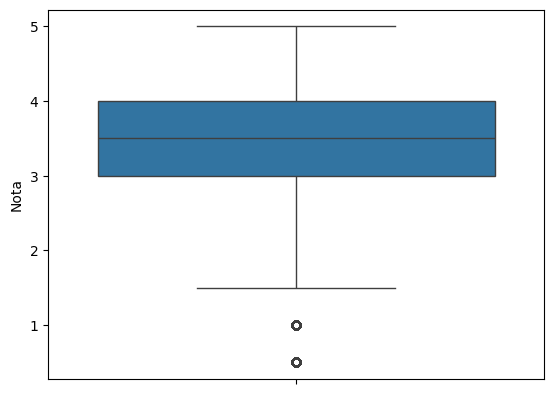

In [8]:
import seaborn as sns

sns.boxplot(notas.Nota)

#reads the file movies, renames the columns and show the head of the sheet

In [10]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "Titulo", "Genero"]
filmes.head()

,filmeId,Titulo,Genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
notas.head()

,IdUsuário,IdFilme,Nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#Queries the movies with Id 1, comparing the notes and shows the average

In [12]:
notas.query("IdFilme==1").Nota. mean()

3.9209302325581397

In [13]:
notas.query("IdFilme==2").Nota. mean()

3.4318181818181817

In [14]:
medias_por_filme = notas.groupby("IdFilme").mean().Nota
medias_por_filme.head()

,Nota
IdFilme,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


<Axes: ylabel='Frequency'>

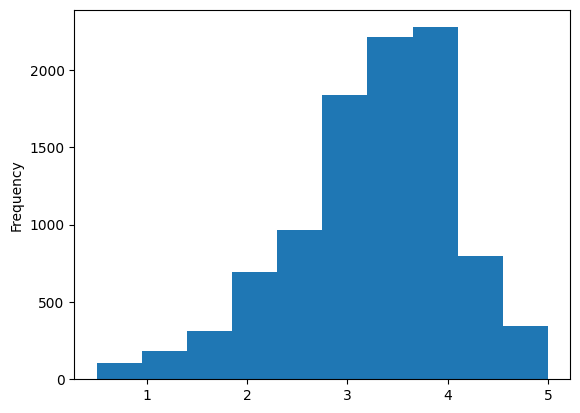

In [15]:
medias_por_filme.plot(kind='hist')

In [16]:
import seaborn as sns


In [17]:
medias_por_filme.describe()

,Nota
count,9724.000000
mean,3.262448
std,0.869874
min,0.500000
25%,2.800000
50%,3.416667
75%,3.911765
max,5.000000


<ipython-input-18-5bf8cca2d6c7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medias_por_filme, bins=10)


<Axes: xlabel='Nota', ylabel='Density'>

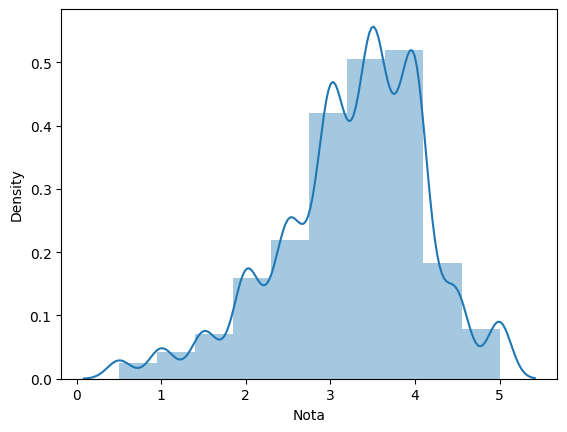

In [18]:
sns.distplot(medias_por_filme, bins=10)

In [20]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [21]:
tmdb.original_language.unique() #categorica nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

#categorica ordinal

In [22]:
#first_grade
#second_grade
#third_grade
#first_grade < second_grade < third_grade
# budget is a continuos quantitative data
# vote amount => 1,2,3,4 ... there is no 2,7 or 1,5
# movielens notes => 0,5, 1 , 1,5, 2, 2,5, but there is no 2,7 or 1.5 either


#turns notes into a escalar variable with intervals

In [23]:
tmdb.vote_average.unique()

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

#counts how many times each language appears

In [24]:
tmdb["original_language"].value_counts()

,count
original_language,
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12


#shows the indexes

In [25]:
tmdb["original_language"].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object', name='original_language')

#shows the values

In [26]:
tmdb["original_language"].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

#serie

In [27]:
tmdb["original_language"].value_counts()

,count
original_language,
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12


In [28]:
tmdb["original_language"].value_counts().to_frame()

,count
original_language,
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12


#transforms the index into a column, called "index"

In [29]:
tmdb["original_language"].value_counts().to_frame().reset_index()

,original_language,count
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


In [30]:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()


,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


#plots a bar graphic "manually"

<Axes: xlabel='original_language', ylabel='total'>

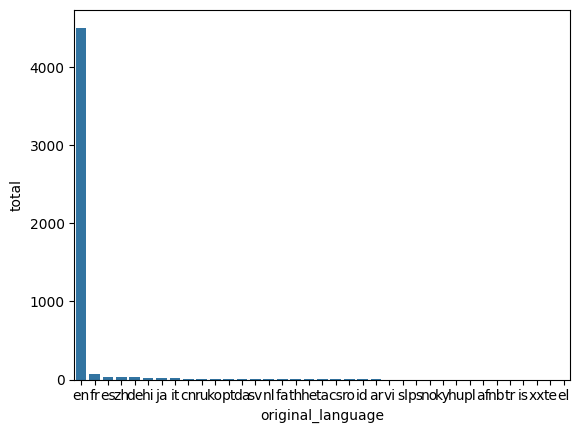

In [31]:
sns.barplot(x="original_language", y="total", data = contagem_de_lingua)

#the syntax catplot separates automatically by category, so u can use the tmdb full source as a parameter, but you have to specify wich kind

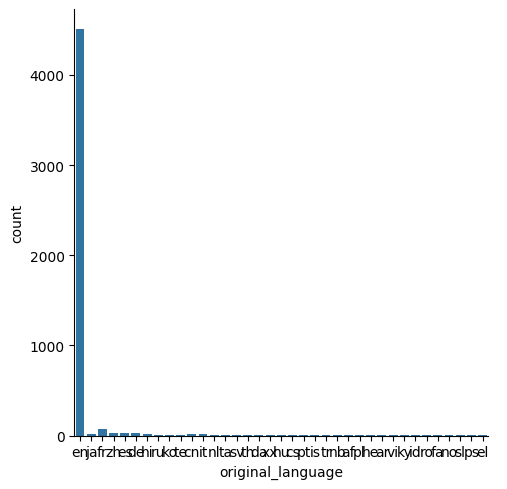

In [32]:
sns.catplot(x="original_language", kind="count", data = tmdb)

In [33]:
import matplotlib.pyplot as plt


([<matplotlib.patches.Wedge at 0x7edd48c85ea0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

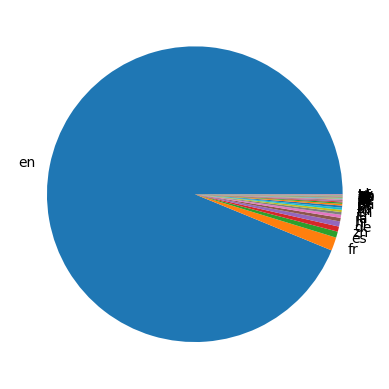

In [34]:
plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["original_language"])

In [35]:
total_por_lingua = tmdb["original_language"].value_counts()
total_por_lingua.loc["en"]
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print (total_de_ingles, total_do_resto)



4505 298


In [36]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'Total' : [total_de_ingles, total_do_resto]
}
dados

{'lingua': ['ingles', 'outros'], 'Total': [4505, 298]}

In [37]:
dados = pd.DataFrame(dados)
dados


,lingua,Total
0,ingles,4505
1,outros,298


<Axes: xlabel='lingua', ylabel='Total'>

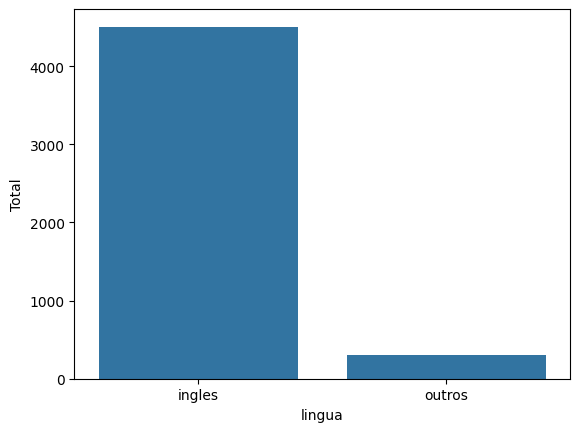

In [38]:
sns.barplot (x="lingua", y="Total", data = dados)

In [39]:
import matplotlib as plt



([<matplotlib.patches.Wedge at 0x7edd48be8cd0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

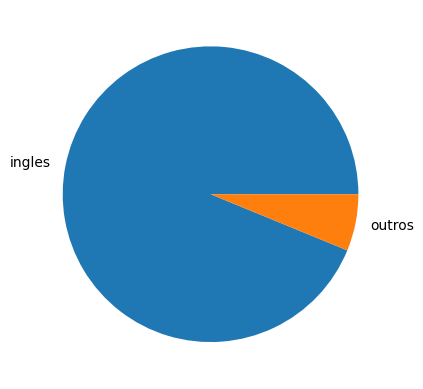

In [40]:
import matplotlib.pyplot as plt

plt.pie(dados["Total"], labels = dados["lingua"])

In [41]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()

total_por_lingua_de_outros_filmes

,count
original_language,
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ko,11


#movies without english language, using aspect, order and palette

<ipython-input-42-5480fe289d94>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="original_language", kind="count", data = Filmes_sem_ingles,


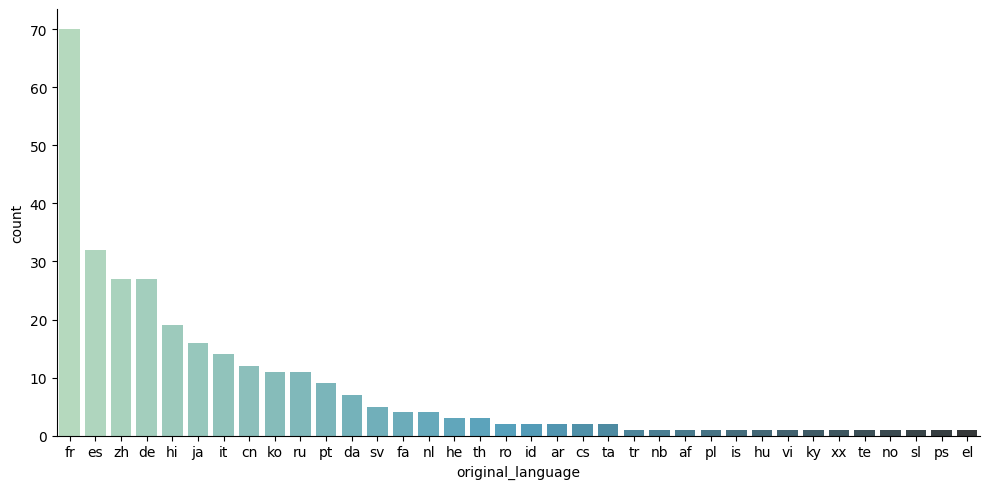

In [42]:
Filmes_sem_ingles = tmdb.query("original_language != 'en'")
Filmes_sem_ingles.head()

sns.catplot(x="original_language", kind="count", data = Filmes_sem_ingles,
            aspect = 2, palette = 'GnBu_d', order = total_por_lingua_de_outros_filmes.index )



#the same plot above, without aspect, order and palette commands

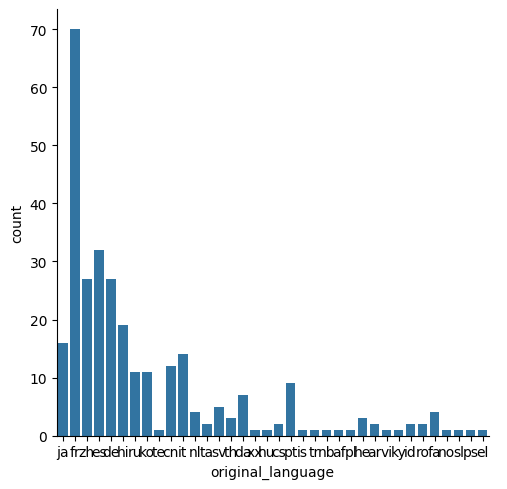

In [43]:
sns.catplot(x="original_language", kind="count", data = Filmes_sem_ingles)


In [44]:
tmdb["original_language"].value_counts().index

tmdb["original_language"].value_counts().values
print(tmdb["original_language"].value_counts().index)
print(tmdb["original_language"].value_counts().values)

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object', name='original_language')
[4505   70   32   27   27   19   16   14   12   11   11    9    7    5
    4    4    3    3    2    2    2    2    2    1    1    1    1    1
    1    1    1    1    1    1    1    1    1]


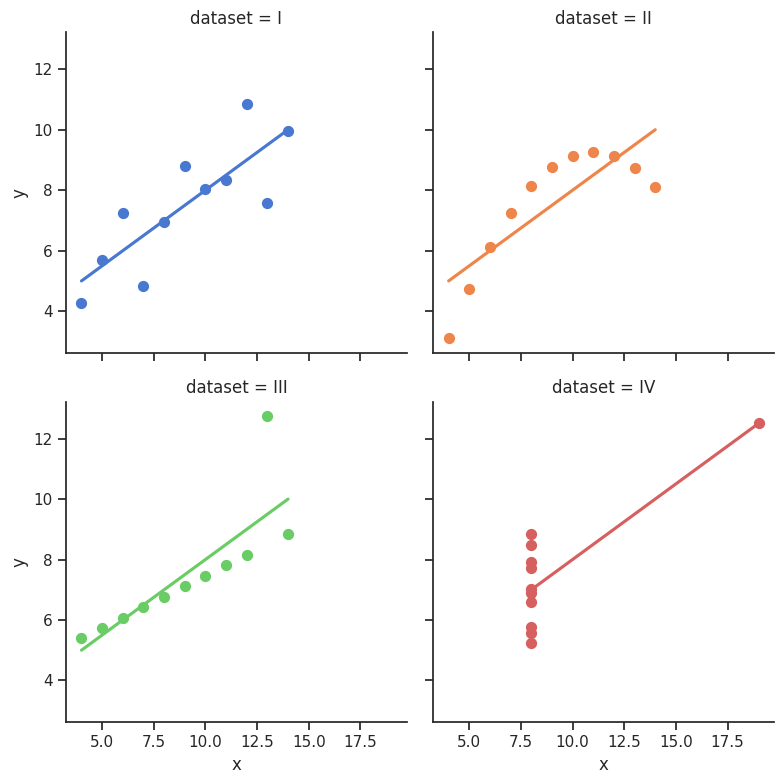

In [45]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

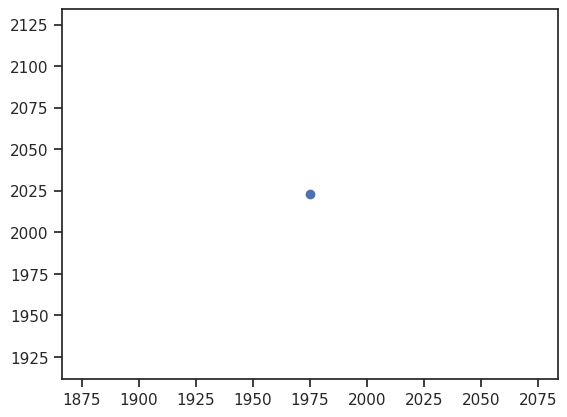

In [46]:
import matplotlib.pyplot as plt

# Create a scatter plot of the data.
plt.scatter(x=1975, y=2023)

# Show the plot.
plt.show()

#shows only the 2 first lines of the sheet

In [47]:
filmes.head(2)

,filmeId,Titulo,Genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [48]:
notas.head(2)

,IdUsuário,IdFilme,Nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247


#prints the amount of notes only from the filmes com Id 1 e 2

In [49]:
notas_do_toy_story = notas.query("IdFilme==1")
notas_do_jumanji = notas.query("IdFilme==2")
print (len(notas_do_toy_story), len(notas_do_jumanji))


215 110


#prints the average note from the the movies

In [50]:
print("Nota_media_do_Toy_Story %.2f" % notas_do_toy_story.Nota.mean())
print("Nota_media_do_Toy_Story %.2f" % notas_do_jumanji.Nota.mean())

Nota_media_do_Toy_Story 3.92
Nota_media_do_Toy_Story 3.43


In [51]:
print("Nota_media_do_Toy_Story %.2f" % notas_do_toy_story.Nota.median())
print("Nota_media_do_Toy_Story %.2f" % notas_do_jumanji.Nota.median())

Nota_media_do_Toy_Story 4.00
Nota_media_do_Toy_Story 3.50


#Para estudarmos mais profundamente a dispersão de dados, criaremos um exemplo hipotético com dois conjuntos de 20 notas cada um. O primeiro, filme1, contém um conjunto de 10 notas 2,5, e outro de 10 notas 3,5. Já o segundo, filme2, contém conjuntos de notas 5 e 1. Essas notas são agrupadas em arrays do Numpy.

In [52]:
import numpy as np

np.array([2.5]*10)

array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5])

In [53]:
filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))
print(filme1.mean(), filme2.mean())
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.median(filme2))



3.0 3.0
0.5 2.0
3.0 3.0


In [54]:
import matplotlib.pyplot as plt


{'whiskers': [<matplotlib.lines.Line2D at 0x7edd4855efb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7edd48815420>,
 'boxes': [<matplotlib.lines.Line2D at 0x7edd4855ec50>,
 'medians': [<matplotlib.lines.Line2D at 0x7edd4855f370>,
 'fliers': [<matplotlib.lines.Line2D at 0x7edd4855f610>,
 'means': []}

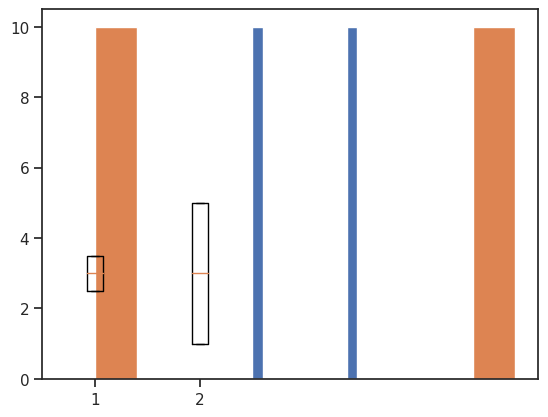

In [55]:
plt.hist(filme1)
plt.hist(filme2)

plt.boxplot([filme1, filme2])


{'whiskers': [<matplotlib.lines.Line2D at 0x7edd485f22f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7edd485f2830>,
 'boxes': [<matplotlib.lines.Line2D at 0x7edd485f1f90>,
 'medians': [<matplotlib.lines.Line2D at 0x7edd485f2d70>,
 'fliers': [<matplotlib.lines.Line2D at 0x7edd485f3010>,
 'means': []}

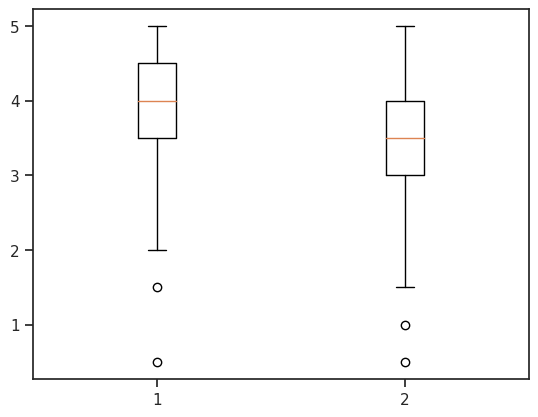

In [56]:
plt.boxplot([notas_do_toy_story.Nota, notas_do_jumanji.Nota])
